Colab Link for ALL 3 TASK :

Task 1 : - https://colab.research.google.com/drive/18bCExWwfVT0g2uWh7tqDr1vsXcjEGx6l#scrollTo=1UEpkujLAWEa

Task 2 : https://colab.research.google.com/drive/1428-0THwtMUC_qGeZX6lieJSwpvEHjGj

Task 3 : https://colab.research.google.com/drive/1UrMuMc_lgAuQnYGTV5ycWNoc5sBdcKQp


#### Reference Link

*   https://stackoverflow.com/questions/78196651/tensorflow-error-loading-model-attributeerror-exception-encountered-when-callin
*   https://keras.io/guides/serialization_and_saving/


*   https://github.com/keras-team/keras/issues/18903
*   https://keras.io/api/applications/mobilenet/
* https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2
* https://www.tensorflow.org/hub
* https://www.tensorflow.org/tutorials/images/cnn





In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import struct
import pandas as pd
import copy
import cv2
import tensorflow as tf
import tensorflow_hub as hb
from tensorflow import keras
from keras import layers, models,regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from google.colab import drive
import matplotlib.image as mpimg
import datetime
import random

from skimage.filters import prewitt_h,prewitt_v
from sklearn.preprocessing import StandardScaler,MinMaxScaler



drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print("Version of tensorflow:",tf.__version__)
print("Tensorflow_hub version:",hb.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version of tensorflow: 2.17.0
Tensorflow_hub version: 0.16.1
GPU is available


In [ ]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [ ]:
# ### checking the file content for each folder
# dataset_path = '/content/drive/My Drive/CS517_Data_Set/'
# print(os.listdir(dataset_path + 'train-images-idx3-ubyte'))

In [ ]:
### Storing Data after converting from the IDX formate

# train_images_path = '/content/drive/My Drive/CS517_Data_Set/train-images-idx3-ubyte/train-images-idx3-ubyte'
# train_image_labels_path  =  '/content/drive/My Drive/CS517_Data_Set/train-labels-idx1-ubyte/train-labels-idx1-ubyte'

# testing_image_path  = '/content/drive/My Drive/CS517_Data_Set/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
# testing_image_labels_path = '/content/drive/My Drive/CS517_Data_Set/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'
train_images_path =  '/content/gdrive/MyDrive/CS417_dataset/train-images.idx3-ubyte'
train_image_labels_path  =  '/content/gdrive/MyDrive/CS417_dataset/train-labels.idx1-ubyte'

testing_image_path  = '/content/gdrive/MyDrive/CS417_dataset/t10k-images.idx3-ubyte'
testing_image_labels_path = '/content/gdrive/MyDrive/CS417_dataset/t10k-labels.idx1-ubyte'


### Storing the images into training and testing

Training_set = read_idx(train_images_path)
Training_labels = read_idx(train_image_labels_path)

Testing_set = read_idx(testing_image_path)
Testing_labels = read_idx(testing_image_labels_path)

In [ ]:
Training_set.shape , Training_labels.shape,   Testing_set.shape  , Testing_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### -----------------CHECKING IF THE DATA IS IN TENSOR OR NOT

In [ ]:
# is_tensor = tf.is_tensor(Training_set)
# print(is_tensor)

 ### --------------CONVERTING  DATA SET IT INTO TENSOR

In [ ]:
Training_image_tensor = tf.convert_to_tensor(Training_set, dtype = tf.float32)  ## Converting the Training image into Tensor
Training_labesl_tensor = tf.convert_to_tensor(Training_labels , dtype = tf.int32)   ## converting the Training Labels into tensor

Testing_image_tensor = tf.convert_to_tensor(Testing_set, dtype = tf.float32) ## converting the Testing data set into  tensor
Testing_labels_tensor = tf.convert_to_tensor(Testing_labels, dtype = tf.int32)

In [ ]:
is_tensor = tf.is_tensor(Training_image_tensor)
print(is_tensor)
print(type(Training_image_tensor))

True
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
Training_image_tensor.shape, Training_labesl_tensor.shape , Testing_image_tensor.shape,  Testing_labels_tensor.shape

(TensorShape([60000, 28, 28]),
 TensorShape([60000]),
 TensorShape([10000, 28, 28]),
 TensorShape([10000]))

In [ ]:

## Ploating the images from the traing dataset

def plot_image(data_set, labels, num_images=5):

    plt.figure(figsize=(28,28))   ## thei size of image input is  28 x 28 t
    for i in range(num_images):
        idx = random.randint(0, data_set.shape[0] - 1)
        img = data_set[idx]
        label = labels[idx]

        ax = plt.subplot(1, num_images, i + 1)
        ax.title.set_text(f"Label: {label}")
        plt.imshow(img, cmap='gray')   ## displaying the color ofi image


    plt.show()

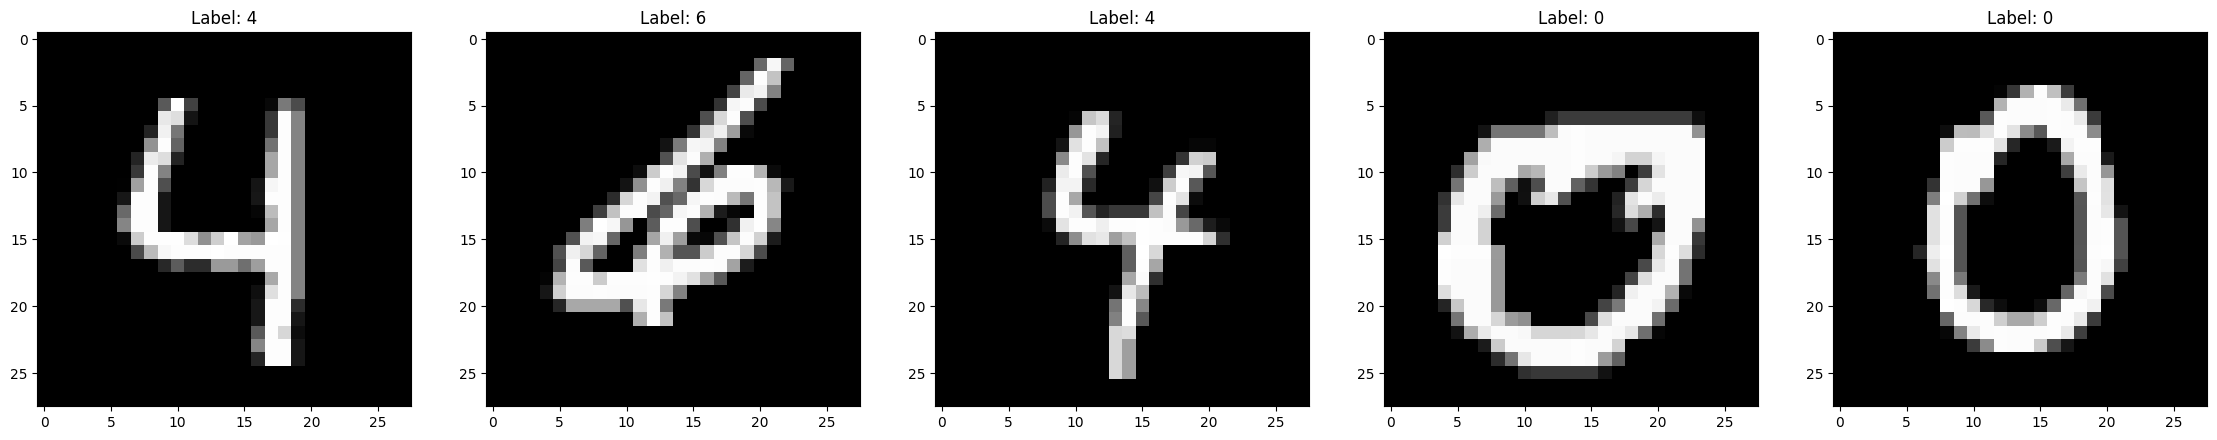

In [ ]:
## Ploating some image form traing set
plot_image(Training_image_tensor,Training_labesl_tensor)

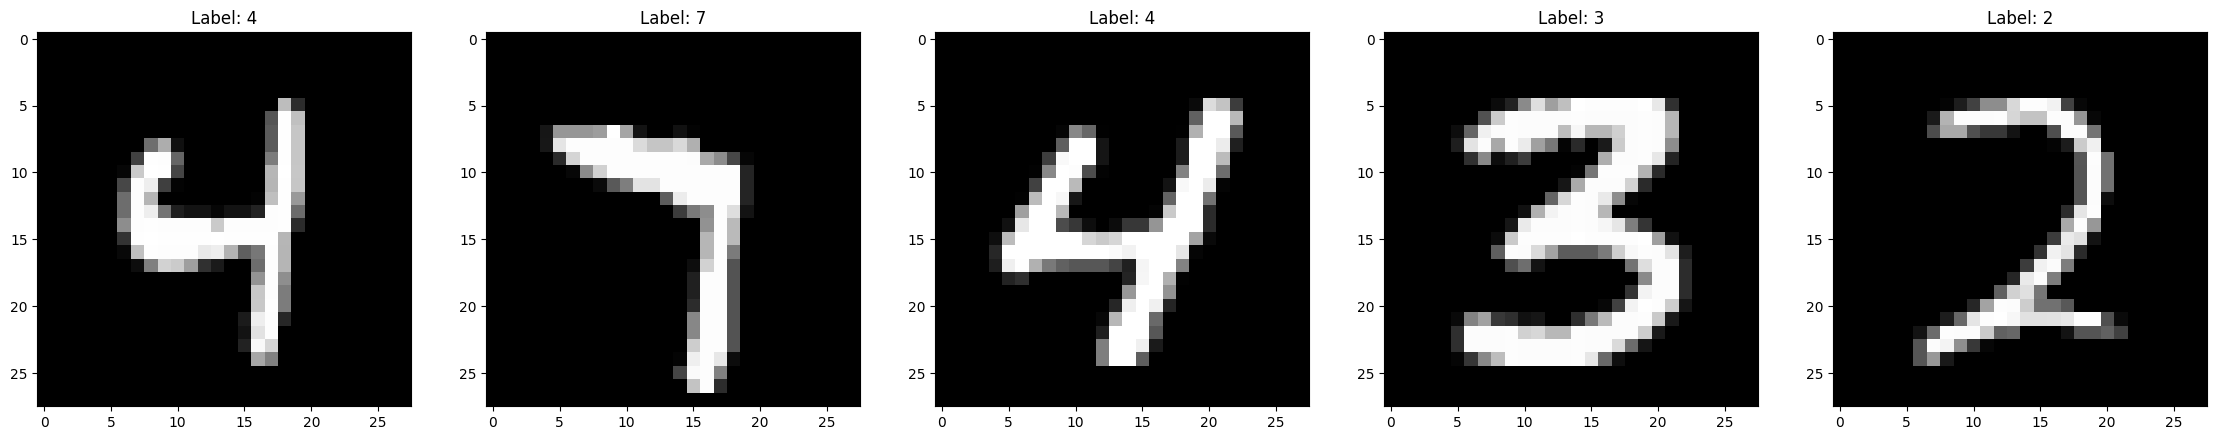

In [ ]:
## Ploating some images for testing set
plot_image(Testing_image_tensor,Testing_labels_tensor)

### ---------------------------------------------- Function to Plot the traning history vs Validation

In [ ]:
def plot_training_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # accuracy for training and validation
    plt.figure(figsize=(10,5), frameon=False)
    plt.plot(epochs, acc, c='g', ls='-.', lw='4', label='Training Accuracy')
    plt.plot(epochs, val_acc, c='r', ls='-.', lw='4', label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy for Training and Validation over the Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    # loss for training and validation
    plt.figure(figsize=(10,5), frameon=False)
    plt.plot(epochs, loss, c='b', ls='-.', lw='4', label='Training Loss')
    plt.plot(epochs, val_loss, c='orange', ls='-.', lw='4', label='Validation Loss')
    plt.legend()
    plt.title('Loss for Training and Validation over the Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


### **Code Task (2)** Fine-tune at least three different well-pretrained models (e.g., MobileNetV3, Resnet50 ) to get a good performance. You need to choose the specific layers to retrained and write it in the report


##### Model that we are using are and references :
*  Keras : https://keras.io/api/applications/mobilenet/
*  Keras_fine tuining : https://keras.io/guides/transfer_learning/
*   Mobilenet_V2 :
 https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2
*   ResNet50     :  https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50
*   InceptionV3    :
 https://www.tensorflow.org/api_docs/python/tf/keras/applications/InceptionV3
*   VGG16       :
 https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16
*   NASANET Mobile  :
 https://www.tensorflow.org/api_docs/python/tf/keras/applications/NASNetMobile


 ## --------------  USING BASE MODEL : - MobileNet V2 ------------------------------------------

In [ ]:
Training_image_tensor.shape, Training_labesl_tensor.shape , Testing_image_tensor.shape,  Testing_labels_tensor.shape

(TensorShape([60000, 28, 28]),
 TensorShape([60000]),
 TensorShape([10000, 28, 28]),
 TensorShape([10000]))

#### Expanding and resize the Input tensor to meet the requiremnt of MobileNETV2

In [ ]:
## MobileNet V2 take tensor of input size 32 x 32
## so we will reize the tensor from 28 x 28 ---- > 32 x 32

train_images_expanded = tf.expand_dims(Training_image_tensor, axis=-1)  # Adds a channel dimension (as our channel is gray color)
test_images_expanded = tf.expand_dims(Testing_image_tensor, axis=-1)


Training_image_tensor_resized = tf.image.resize(train_images_expanded, [32,32])
Testing_image_tensor_resized = tf.image.resize(test_images_expanded ,[32, 32])



In [ ]:
Training_image_tensor_resized.shape, Testing_image_tensor_resized.shape,

(TensorShape([60000, 32, 32, 1]), TensorShape([10000, 32, 32, 1]))

### ---------------------- Traning and Validation set ----------------------------------

In [ ]:
### For Spliting the Training set into train and validation set

dataset_size = Training_image_tensor_resized.shape[0]
val_size = int(0.2 * dataset_size)
train_size = dataset_size - val_size

#  we will use  tf.split libaray to spilit the tensor data
X_train, X_val = tf.split(Training_image_tensor_resized, [train_size, val_size], axis=0)
y_train, y_val = tf.split(Training_labesl_tensor, [train_size, val_size], axis=0)



In [ ]:
print(f"Training data: {X_train.shape}, Training labels: {y_train.shape}")
print(f"Validation data: {X_val.shape}, Validation labels: {y_val.shape}")

Training data: (48000, 32, 32, 1), Training labels: (48000,)
Validation data: (12000, 32, 32, 1), Validation labels: (12000,)


In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(TensorShape([48000, 32, 32, 1]),
 TensorShape([12000, 32, 32, 1]),
 TensorShape([48000]),
 TensorShape([12000]))

In [ ]:
X_train_rgb = tf.image.grayscale_to_rgb(X_train)
X_val_rgb = tf.image.grayscale_to_rgb(X_val)
Testing_image_rgb = tf.image.grayscale_to_rgb(Testing_image_tensor_resized)

In [ ]:
X_train_rgb.shape , X_val_rgb.shape , Testing_image_rgb.shape

(TensorShape([48000, 32, 32, 3]),
 TensorShape([12000, 32, 32, 3]),
 TensorShape([10000, 32, 32, 3]))

## ------------------------------------- CALLING BASE MODEL OF MobileNetv2-------------------------

In [ ]:
INPUT_SHAPE =(32, 32, 3)
OUTPUT_SHAPE = 10  ## AS WE HAVE 10 CLASS FOR MNIST DATA SET

## create a function which builds a keras MobileNET Default setput

mobilenet_base_model = keras.applications.MobileNetV2(

    input_shape = INPUT_SHAPE,
    alpha=1.0,
    include_top=False,  # Remove the top fully connected layer, becouse of MNist data is only having  having 10 class from 0 -9
    weights="imagenet",  #
    pooling = 'max'  # we will use the max pooling

)

# ---------------------------------------------Add custom classification layers to  base model at the end for the dense layer--------------------------------------------------------------------

## ------------------------------ freezing the base model layer---------------------------------------------------------------------
for layer in mobilenet_base_model.layers:
    layer.trainable = False
### -------------------------------------------------------------------------------------------------------------------------------


model_base_MobileNetv2_dense_layer = keras.Sequential([
    mobilenet_base_model,

    # ## Adding one more last layer to train more correctly
    # layers.Conv2D(128,(3,3), padding = 'same'),
    # layers.Activation('relu'),
    # layers.BatchNormalization(),
    # layers.MaxPooling2D(pool_size=(2,2), padding=  'same'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.1),
    layers.Dense(OUTPUT_SHAPE, activation='softmax')
])



<ipython-input-23-51d5b0649e37>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base_model = keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### --------------------------- Compiling the Base Model ------------------------------

In [ ]:
## -----------------Compiling the base model with my Own Custom Layer------------------------------------

model_base_MobileNetv2_dense_layer.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),

    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)


## -------- Printing layers of base_model with custom dense layer and there trainable status ----------

In [ ]:
layer_params = {}
for layer in model_base_MobileNetv2_dense_layer.layers:
    layer_name = layer.name
    layer_params[layer_name] = {
        'trainable_weights': layer.trainable_weights,
        'non_trainable_weights': layer.non_trainable_weights
    }

for layer_name, params in layer_params.items():
    print(f"Layer Name: {layer_name}")
    print(f"Trainable Weights: {params['trainable_weights']}")
    print(f"Non-trainable Weights: {params['non_trainable_weights']}")
    print('-' * 50)


Layer Name: mobilenetv2_1.00_224
Trainable Weights: []
Non-trainable Weights: [<KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=Conv1/kernel>, <KerasVariable shape=(32,), dtype=float32, path=bn_Conv1/gamma>, <KerasVariable shape=(32,), dtype=float32, path=bn_Conv1/beta>, <KerasVariable shape=(32,), dtype=float32, path=bn_Conv1/moving_mean>, <KerasVariable shape=(32,), dtype=float32, path=bn_Conv1/moving_variance>, <KerasVariable shape=(3, 3, 32, 1), dtype=float32, path=expanded_conv_depthwise/kernel>, <KerasVariable shape=(32,), dtype=float32, path=expanded_conv_depthwise_BN/gamma>, <KerasVariable shape=(32,), dtype=float32, path=expanded_conv_depthwise_BN/beta>, <KerasVariable shape=(32,), dtype=float32, path=expanded_conv_depthwise_BN/moving_mean>, <KerasVariable shape=(32,), dtype=float32, path=expanded_conv_depthwise_BN/moving_variance>, <KerasVariable shape=(1, 1, 32, 16), dtype=float32, path=expanded_conv_project/kernel>, <KerasVariable shape=(16,), dtype=float32, path=exp

## ------------------------- Normalization of  Input Features------------------------------------

In [ ]:
#model_base_MobileNetv2.summary()
X_train_rgb = X_train_rgb / 255.0
X_val_rgb = X_val_rgb / 255.0


In [ ]:
print(f"X_train_rgb shape: {X_train_rgb.shape}")
print(f"Training_labels :{Training_labesl_tensor.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_rgb shape: {X_val_rgb.shape}")
print(f"y_val shape: {y_val.shape}")



X_train_rgb shape: (48000, 32, 32, 3)
Training_labels :(60000,)
y_train shape: (48000,)
X_val_rgb shape: (12000, 32, 32, 3)
y_val shape: (12000,)


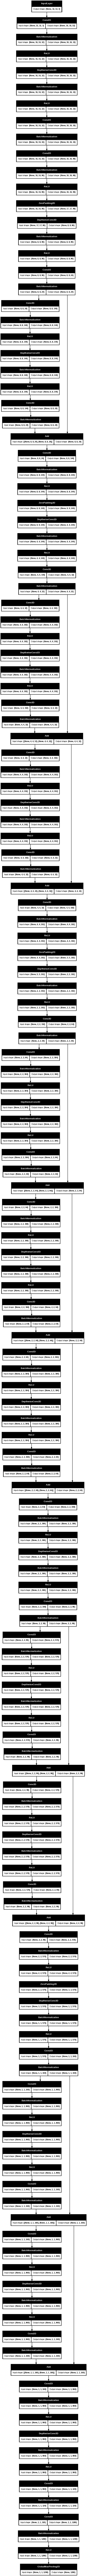

In [ ]:
tf.keras.utils.plot_model(mobilenet_base_model,show_shapes=True , dpi =60)

In [ ]:
X_train_rgb.shape, X_val_rgb.shape

(TensorShape([48000, 32, 32, 3]), TensorShape([12000, 32, 32, 3]))

In [ ]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
ensorboard_logistic = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:

Early_callback_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)



In [ ]:
X_train_rgb.shape, y_train.shape, X_val_rgb.shape, y_val.shape

(TensorShape([48000, 32, 32, 3]),
 TensorShape([48000]),
 TensorShape([12000, 32, 32, 3]),
 TensorShape([12000]))

In [ ]:

history_before_retain = model_base_MobileNetv2_dense_layer.fit(
    x=X_train_rgb,
    y=y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val_rgb, y_val),
    verbose=2,
    callbacks=[Early_callback_stop, ensorboard_logistic]
)




Epoch 1/10
3000/3000 - 30s - 10ms/step - accuracy: 0.2810 - loss: 2.1758 - val_accuracy: 0.3957 - val_loss: 2.0743
Epoch 2/10
3000/3000 - 18s - 6ms/step - accuracy: 0.4357 - loss: 1.9843 - val_accuracy: 0.4708 - val_loss: 1.8920
Epoch 3/10
3000/3000 - 18s - 6ms/step - accuracy: 0.4779 - loss: 1.8110 - val_accuracy: 0.4971 - val_loss: 1.7258
Epoch 4/10
3000/3000 - 18s - 6ms/step - accuracy: 0.4988 - loss: 1.6615 - val_accuracy: 0.5151 - val_loss: 1.5907
Epoch 5/10
3000/3000 - 18s - 6ms/step - accuracy: 0.5185 - loss: 1.5450 - val_accuracy: 0.5327 - val_loss: 1.4887
Epoch 6/10
3000/3000 - 18s - 6ms/step - accuracy: 0.5377 - loss: 1.4581 - val_accuracy: 0.5512 - val_loss: 1.4118
Epoch 7/10
3000/3000 - 17s - 6ms/step - accuracy: 0.5547 - loss: 1.3922 - val_accuracy: 0.5707 - val_loss: 1.3527
Epoch 8/10
3000/3000 - 18s - 6ms/step - accuracy: 0.5684 - loss: 1.3407 - val_accuracy: 0.5853 - val_loss: 1.3057
Epoch 9/10
3000/3000 - 17s - 6ms/step - accuracy: 0.5808 - loss: 1.2997 - val_accuracy:

In [ ]:
training_history = history_before_retain.history

max_training_accuracy = max(training_history['accuracy'])
max_validation_accuracy = max(training_history['val_accuracy'])

# Print the metrics
print("Training Metrics Before Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy}")
print(f" Max Validation Accuracy: {max_validation_accuracy}")


Training Metrics Before Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.5926250219345093
 Max Validation Accuracy: 0.6055833101272583


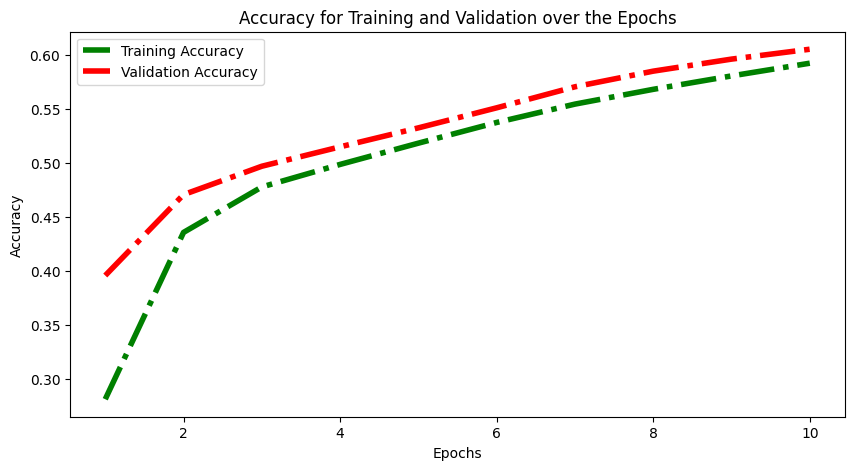

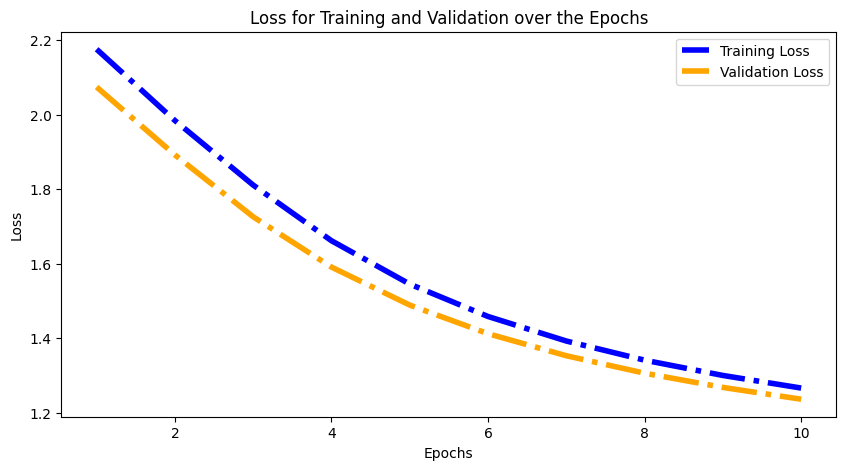

In [ ]:
### Graph of Training vs Validation with Base Model
plot_training_history(history_before_retain)

## ------------------------------------------ Final Prediction on Testing Data Set ---------------------------------

In [ ]:

Testing_image_rgb_N = Testing_image_rgb / 255.0

In [ ]:
Testing_image_rgb_N.shape, Testing_labels_tensor.shape

(TensorShape([10000, 32, 32, 3]), TensorShape([10000]))

In [ ]:
### --------------------------------- Doint prediction on the Testing DATA SET-------------------------------------------
predictions_labels = model_base_MobileNetv2_dense_layer.predict(Testing_image_rgb_N)
pre_labels = np.argmax(predictions_labels, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


In [ ]:
Testing_accuracy = accuracy_score(Testing_labels_tensor,pre_labels)
print(f"Testing Accuracy of Base Model + Dense Layer : {Testing_accuracy}")

Testing Accuracy of Base Model + Dense Layer : 0.5932


# ------------------------------------------Fining Tuning the Base Model LAYERS (Part 2) --------------------


In [ ]:
INPUT_SHAPE_R = (32, 32, 3)
OUTPUT_SHAPE_R = 10

mobilenet_base_model_retrained = tf.keras.applications.MobileNetV2(
    input_shape=INPUT_SHAPE_R,
    alpha=1.0,
    include_top=False,  # Remove the top fully connected layer
    weights="imagenet",
    pooling='max'  # We will use max pooling
)






<ipython-input-40-de51bf2131e3>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base_model_retrained = tf.keras.applications.MobileNetV2(


In [ ]:
for layer in mobilenet_base_model_retrained.layers:
    layer.trainable = False

# specific layers to trainable (fine-tuning)
for layer in mobilenet_base_model_retrained.layers:
    if layer.name in ['block_14_depthwise', 'block_14_project', 'block_14_expand',
                      'block_15_depthwise', 'block_15_project', 'block_15_expand',
                      'block_16_depthwise', 'block_16_project', 'block_16_expand', 'Conv_1']:
        layer.trainable = True


In [ ]:

inputs = tf.keras.Input(shape=INPUT_SHAPE_R)
x = mobilenet_base_model_retrained(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(OUTPUT_SHAPE_R, activation='softmax')(x)


model_base_MobileNetv2_dense_layer_Retrained = tf.keras.Model(inputs, outputs)


model_base_MobileNetv2_dense_layer_Retrained.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [ ]:
model_base_MobileNetv2_dense_layer_Retrained.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 1,675,978 (6.39 MB)

 Non-trainable params: 747,264 (2.85 MB)

In [ ]:
Early_callback_stop_retrained = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
history_after_Fine_tuning = model_base_MobileNetv2_dense_layer_Retrained.fit(
    x=X_train_rgb,
    y=y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val_rgb, y_val),
    verbose=2,
    callbacks=[Early_callback_stop_retrained, ensorboard_logistic]
)


Epoch 1/10
3000/3000 - 31s - 10ms/step - accuracy: 0.8210 - loss: 0.5730 - val_accuracy: 0.8919 - val_loss: 0.3203
Epoch 2/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9183 - loss: 0.2482 - val_accuracy: 0.9348 - val_loss: 0.1973
Epoch 3/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9334 - loss: 0.2024 - val_accuracy: 0.9442 - val_loss: 0.1802
Epoch 4/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9408 - loss: 0.1791 - val_accuracy: 0.9442 - val_loss: 0.1691
Epoch 5/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9465 - loss: 0.1617 - val_accuracy: 0.9434 - val_loss: 0.1686
Epoch 6/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9516 - loss: 0.1495 - val_accuracy: 0.9483 - val_loss: 0.1576
Epoch 7/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9543 - loss: 0.1389 - val_accuracy: 0.9578 - val_loss: 0.1328
Epoch 8/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9575 - loss: 0.1289 - val_accuracy: 0.9542 - val_loss: 0.1405
Epoch 9/10
3000/3000 - 20s - 7ms/step - accuracy: 0.9604 - loss: 0.1201 - val_accuracy:

In [ ]:
training_history_after_Fine_tuning = history_after_Fine_tuning.history

max_training_accuracy_fine_tuning = max(training_history_after_Fine_tuning['accuracy'])
max_validation_accuracy_fine_tuning = max(training_history_after_Fine_tuning['val_accuracy'])

# Print the metrics
print("Training Metrics After Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy_fine_tuning}")
print(f" Max Validation Accuracy: {max_validation_accuracy_fine_tuning}")


Training Metrics After Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.9616041779518127
 Max Validation Accuracy: 0.9595000147819519


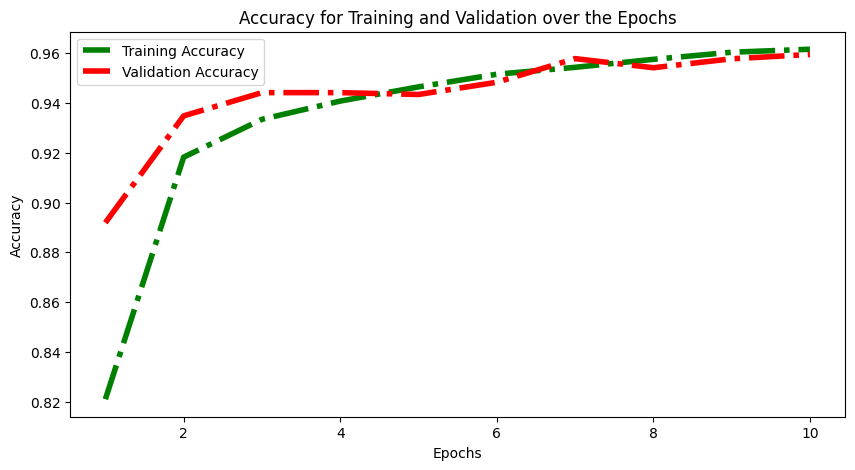

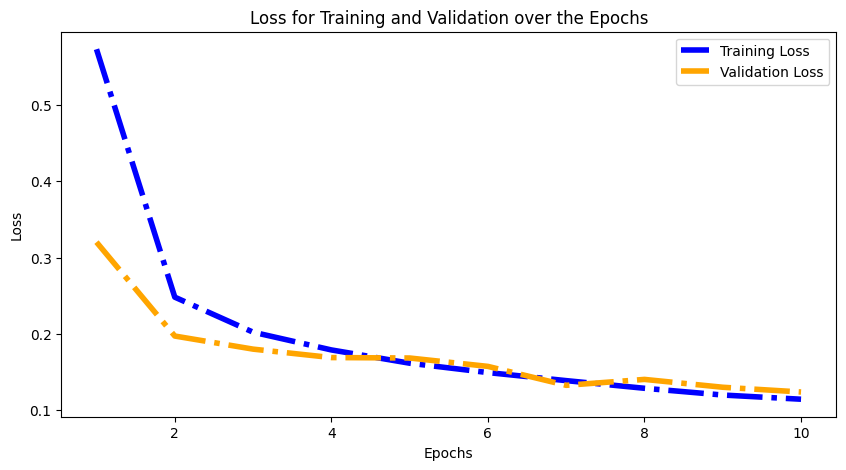

In [ ]:
plot_training_history(history_after_Fine_tuning)

## ----------------------- Testing the Fine tune model On Testing Set ------------------------------------------

In [ ]:
Testing_image_rgb.shape, Testing_labels_tensor.shape

(TensorShape([10000, 32, 32, 3]), TensorShape([10000]))

In [ ]:
## Normalizing the Testing image
Testing_image_rgb = Testing_image_rgb / 255.0


In [ ]:
predictions_labels_retrained = model_base_MobileNetv2_dense_layer_Retrained.predict(Testing_image_rgb)
pre_labels_retrained = np.argmax(predictions_labels_retrained, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


In [ ]:
testing_Accuracy_retrained = accuracy_score(Testing_labels_tensor,pre_labels_retrained)

print(f"Testing Accuracy after Fine Tuning the Base Model : {testing_Accuracy_retrained}")

Testing Accuracy after Fine Tuning the Base Model : 0.9584


### Testing Accuracy after Fine Tuning :


*  layer ['Conv1','expanded_conv_depthwise' ]  == >  65.81%
*   layer ['block_15_depthwise','block_15_project', 'block_15_expand']  == > 94.98 %
*   layer ['block_14_depthwise','block_14_project', 'block_14_expand','block_15_depthwise','block_15_project', 'block_15_expand'] === > 93.62%

*  Layer = ['block_14_depthwise','block_14_project', 'block_14_expand','block_15_depthwise','block_15_project', 'block_15_expand','block_16_depthwise','block_16_project', 'block_16_expand','Conv_1']    ==== > 95.58


### Saving the model

In [ ]:
for layer in model_base_MobileNetv2_dense_layer_Retrained.layers:

    print(f"Layer Name: {layer.output}")


Layer Name: <KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor_468>
Layer Name: <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_467>
Layer Name: <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_470>
Layer Name: <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_471>
Layer Name: <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_472>


In [ ]:
model_base_MobileNetv2_dense_layer_Retrained.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,775,200 (22.03 MB)

 Trainable params: 1,675,978 (6.39 MB)

 Non-trainable params: 747,264 (2.85 MB)

 Optimizer params: 3,351,958 (12.79 MB)

In [ ]:
# Check model layers
for layer in model_base_MobileNetv2_dense_layer_Retrained.layers:
    print(layer.__class__)

<class 'keras.src.layers.core.input_layer.InputLayer'>
<class 'keras.src.models.functional.Functional'>
<class 'keras.src.layers.reshaping.flatten.Flatten'>
<class 'keras.src.layers.core.dense.Dense'>
<class 'keras.src.layers.core.dense.Dense'>


## Saving the Model

In [ ]:


# Save the entire model (architecture + weights + optimizer state)
#model_base_MobileNetv2_dense_layer_Retrained.save('/content/gdrive/My Drive/CS517_Data_Set/MobileNetV2model_fine_tuned.h5')


In [ ]:
# Check model layers
for layer in model_base_MobileNetv2_dense_layer_Retrained.layers:
    print(layer.__class__)


<class 'keras.src.layers.core.input_layer.InputLayer'>
<class 'keras.src.models.functional.Functional'>
<class 'keras.src.layers.reshaping.flatten.Flatten'>
<class 'keras.src.layers.core.dense.Dense'>
<class 'keras.src.layers.core.dense.Dense'>


# ResNETModel  --------------------------------------

## ------------------ CALLING BASE MODEL OF ResNet50 ---------------------------


In [ ]:
INPUT_SHAPE =(32, 32, 3)
OUTPUT_SHAPE = 10  ## AS WE HAVE 10 CLASS FOR MNIST DATA SET

resnet_base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3),pooling='max')

for layer in resnet_base_model.layers:
    layer.trainable = False


model_base_resnet_dense_layer = keras.Sequential([
    resnet_base_model,
    keras.layers.Flatten(),
    # keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(128, activation='relu'),
    # layers.Dropout(0.1),
    keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')
])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# ------------------------ Compiling the Base Model (ResNet) ------------------------------

In [ ]:
model_base_resnet_dense_layer.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),

    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)

In [ ]:
# Check if values are normalized in [0, 1]
min_val = tf.reduce_min(X_train_rgb).numpy()
max_val = tf.reduce_max(X_train_rgb).numpy()

print(f"Min value: {min_val}, Max value: {max_val}")

Min value: 0.0, Max value: 1.0


## Train the the model with the all the layers are frozen

In [ ]:
history_before_retain_resnet = model_base_resnet_dense_layer.fit(
    x=X_train_rgb,
    y=y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val_rgb, y_val),
    verbose=2,
    callbacks=[Early_callback_stop, ensorboard_logistic]
)

Epoch 1/10
3000/3000 - 39s - 13ms/step - accuracy: 0.5293 - loss: 1.7529 - val_accuracy: 0.6708 - val_loss: 1.4082
Epoch 2/10
3000/3000 - 24s - 8ms/step - accuracy: 0.7080 - loss: 1.2601 - val_accuracy: 0.7558 - val_loss: 1.0923
Epoch 3/10
3000/3000 - 24s - 8ms/step - accuracy: 0.7536 - loss: 1.0290 - val_accuracy: 0.7885 - val_loss: 0.9150
Epoch 4/10
3000/3000 - 24s - 8ms/step - accuracy: 0.7784 - loss: 0.8876 - val_accuracy: 0.8108 - val_loss: 0.7960
Epoch 5/10
3000/3000 - 24s - 8ms/step - accuracy: 0.7957 - loss: 0.7926 - val_accuracy: 0.8253 - val_loss: 0.7189
Epoch 6/10
3000/3000 - 24s - 8ms/step - accuracy: 0.8080 - loss: 0.7239 - val_accuracy: 0.8376 - val_loss: 0.6553
Epoch 7/10
3000/3000 - 24s - 8ms/step - accuracy: 0.8192 - loss: 0.6714 - val_accuracy: 0.8448 - val_loss: 0.6116
Epoch 8/10
3000/3000 - 24s - 8ms/step - accuracy: 0.8294 - loss: 0.6296 - val_accuracy: 0.8524 - val_loss: 0.5714
Epoch 9/10
3000/3000 - 24s - 8ms/step - accuracy: 0.8367 - loss: 0.5955 - val_accuracy:

In [ ]:
training_history_resnet = history_before_retain_resnet.history

max_training_accuracy = max(training_history_resnet['accuracy'])
max_validation_accuracy = max(training_history_resnet['val_accuracy'])

# Print the metrics
print("Training Metrics Before Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy}")
print(f" Max Validation Accuracy: {max_validation_accuracy}")

Training Metrics Before Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.8427083492279053
 Max Validation Accuracy: 0.8643333315849304


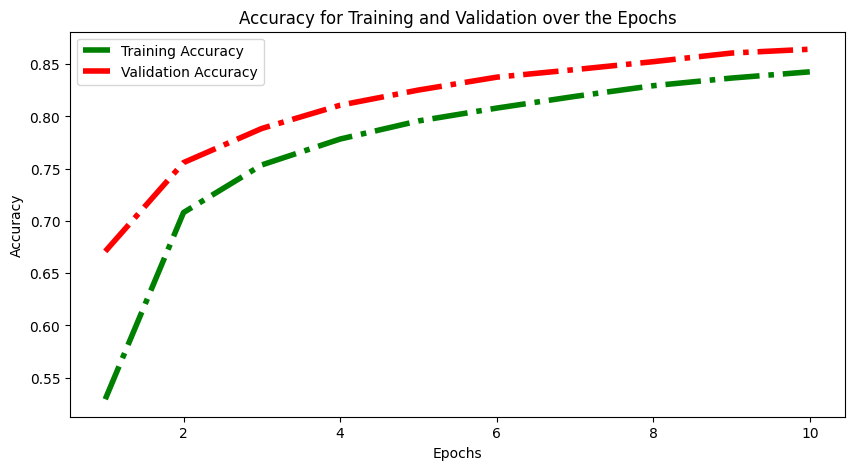

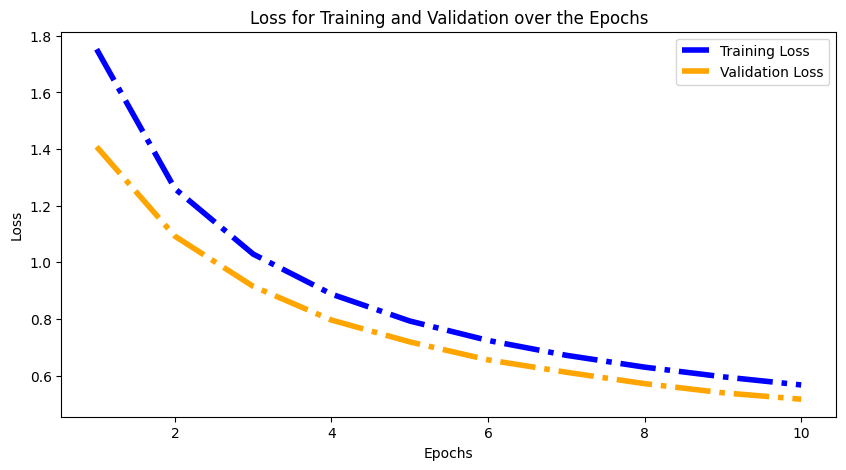

In [ ]:
plot_training_history(history_before_retain_resnet)

# ----------------------- Final Prediction on Testing Data Set (ResNet Model) -----------------------

In [ ]:
Testing_image_rgb_N.shape, Testing_labels_tensor.shape

(TensorShape([10000, 32, 32, 3]), TensorShape([10000]))

In [ ]:
# Check if values are normalized in [0, 1]
min_val = tf.reduce_min(Testing_image_rgb_N).numpy()
max_val = tf.reduce_max(Testing_image_rgb_N).numpy()

print(f"Min value: {min_val}, Max value: {max_val}")


Min value: 0.0, Max value: 1.0


In [ ]:
predictions_labels_resnet = model_base_resnet_dense_layer.predict(Testing_image_rgb_N)
pre_labels = np.argmax(predictions_labels_resnet, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step


In [ ]:
Testing_accuracy_resnet = accuracy_score(Testing_labels_tensor,pre_labels)
print(f"Testing Accuracy of Base Model + Dense Layer : {Testing_accuracy_resnet}")

Testing Accuracy of Base Model + Dense Layer : 0.8638


# ---------------------------Fine Tuning Base Model Layers ResNet50 (Part 2) ---------------------

In [ ]:
resnet_base_model_retrained = keras.applications.ResNet50(
    input_shape = INPUT_SHAPE_R,
    include_top=False,  # Remove the top fully connected layer, becouse of MNist data is only having  having 10 class from 0 -9
    weights="imagenet",
    pooling='max'  # we will use the max pooling

)

## Inspecting the layers' status to choose which specific layers are we going to retrain for fine tuning

In [ ]:
for i, layer in enumerate(resnet_base_model_retrained.layers):
    layer_status = "Trainable" if layer.trainable else "Non-trainable"
    trainable_weights = len(layer.trainable_weights)

    print(f"Layer {i}: {layer.name} - {layer_status} - Trainable Weights: {trainable_weights}")

Layer 0: input_layer_6 - Trainable - Trainable Weights: 0
Layer 1: conv1_pad - Trainable - Trainable Weights: 0
Layer 2: conv1_conv - Trainable - Trainable Weights: 2
Layer 3: conv1_bn - Trainable - Trainable Weights: 2
Layer 4: conv1_relu - Trainable - Trainable Weights: 0
Layer 5: pool1_pad - Trainable - Trainable Weights: 0
Layer 6: pool1_pool - Trainable - Trainable Weights: 0
Layer 7: conv2_block1_1_conv - Trainable - Trainable Weights: 2
Layer 8: conv2_block1_1_bn - Trainable - Trainable Weights: 2
Layer 9: conv2_block1_1_relu - Trainable - Trainable Weights: 0
Layer 10: conv2_block1_2_conv - Trainable - Trainable Weights: 2
Layer 11: conv2_block1_2_bn - Trainable - Trainable Weights: 2
Layer 12: conv2_block1_2_relu - Trainable - Trainable Weights: 0
Layer 13: conv2_block1_0_conv - Trainable - Trainable Weights: 2
Layer 14: conv2_block1_3_conv - Trainable - Trainable Weights: 2
Layer 15: conv2_block1_0_bn - Trainable - Trainable Weights: 2
Layer 16: conv2_block1_3_bn - Trainable 

In [ ]:
# Create an empty list to store layer names that have at least 1 trainable weight
trainable_layers = []

# Traverse the layers starting from layer 125 to the end
for layer in resnet_base_model_retrained.layers[100:]:
    if len(layer.trainable_weights) >= 1:
        trainable_layers.append(layer.name)

In [ ]:
for layer in resnet_base_model_retrained.layers:
    layer.trainable = False

## Customizing the base model with appropriate activation functions and output layer

In [ ]:
for layer in resnet_base_model_retrained.layers:
    if layer.name in trainable_layers:
        layer.trainable = True
    else:
        layer.trainable = False  # Keep other layers frozen

In [ ]:
inputs = tf.keras.Input(shape=INPUT_SHAPE_R)
x = resnet_base_model_retrained(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(OUTPUT_SHAPE_R, activation='softmax')(x)


model_base_ResNet50_dense_layer_Retrained = tf.keras.Model(inputs, outputs)


model_base_ResNet50_dense_layer_Retrained.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

## We fine-tune the specific layers we have unfroze

In [ ]:
Early_callback_stop_retrained = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
history_after_Fine_tuning_resnet = model_base_ResNet50_dense_layer_Retrained.fit(
    x=X_train_rgb,
    y=y_train,
    batch_size=16,
    epochs=10 ,
    validation_data=(X_val_rgb, y_val),
    verbose=2,
    callbacks=[Early_callback_stop_retrained, ensorboard_logistic]
)

Epoch 1/10
3000/3000 - 65s - 22ms/step - accuracy: 0.7138 - loss: 0.9204 - val_accuracy: 0.9170 - val_loss: 0.2903
Epoch 2/10
3000/3000 - 35s - 12ms/step - accuracy: 0.8793 - loss: 0.3969 - val_accuracy: 0.9427 - val_loss: 0.1918
Epoch 3/10
3000/3000 - 36s - 12ms/step - accuracy: 0.9080 - loss: 0.2979 - val_accuracy: 0.9543 - val_loss: 0.1483
Epoch 4/10
3000/3000 - 36s - 12ms/step - accuracy: 0.9271 - loss: 0.2338 - val_accuracy: 0.9614 - val_loss: 0.1209
Epoch 5/10
3000/3000 - 35s - 12ms/step - accuracy: 0.9394 - loss: 0.1933 - val_accuracy: 0.9668 - val_loss: 0.1087
Epoch 6/10
3000/3000 - 35s - 12ms/step - accuracy: 0.9496 - loss: 0.1608 - val_accuracy: 0.9728 - val_loss: 0.0968
Epoch 7/10
3000/3000 - 35s - 12ms/step - accuracy: 0.9566 - loss: 0.1418 - val_accuracy: 0.9733 - val_loss: 0.0847
Epoch 8/10
3000/3000 - 35s - 12ms/step - accuracy: 0.9609 - loss: 0.1264 - val_accuracy: 0.9747 - val_loss: 0.0842
Epoch 9/10
3000/3000 - 35s - 12ms/step - accuracy: 0.9642 - loss: 0.1144 - val_a

In [ ]:
training_history_after_Fine_tuning_resnet = history_after_Fine_tuning_resnet.history

max_training_accuracy_fine_tuning_resnet = max(training_history_after_Fine_tuning_resnet['accuracy'])
max_validation_accuracy_fine_tuning_resnet = max(training_history_after_Fine_tuning_resnet['val_accuracy'])

# Print the metrics
print("Training Metrics After Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy_fine_tuning_resnet}")
print(f" Max Validation Accuracy: {max_validation_accuracy_fine_tuning_resnet}")


Training Metrics After Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.968458354473114
 Max Validation Accuracy: 0.9757500290870667


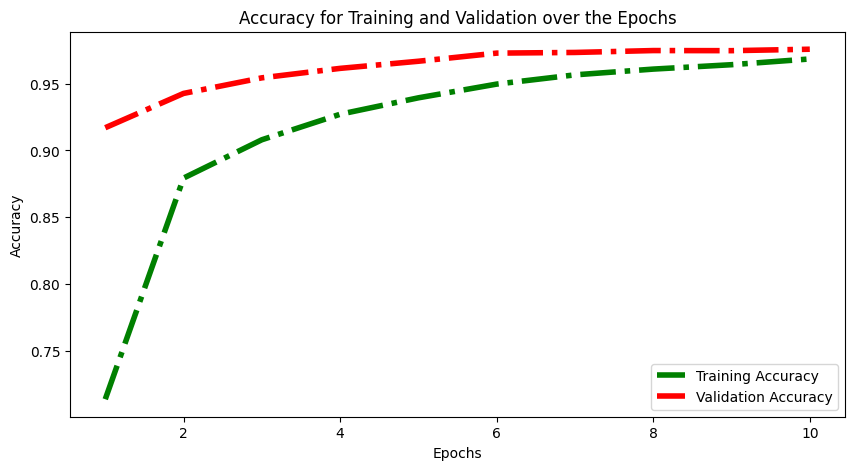

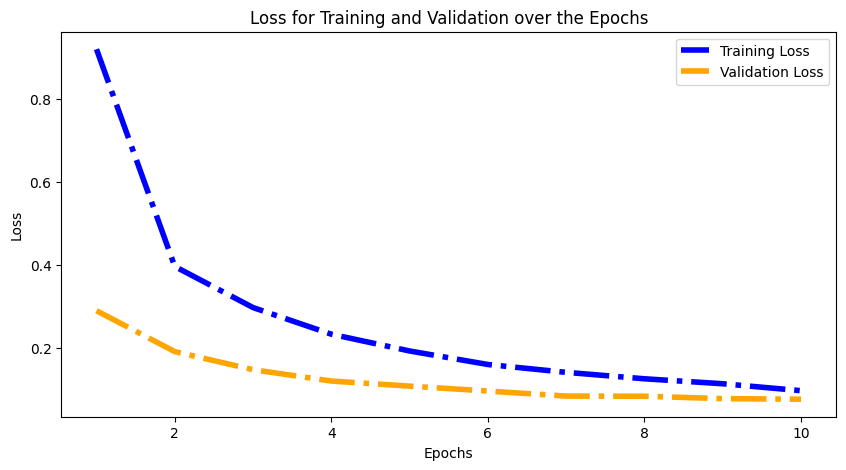

In [ ]:
plot_training_history(history_after_Fine_tuning_resnet)

In [ ]:
predictions_labels_retrained_resnet = model_base_ResNet50_dense_layer_Retrained.predict(Testing_image_rgb)
pre_labels_retrained_resnet = np.argmax(predictions_labels_retrained_resnet, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


In [ ]:
testing_Accuracy_retrained_resnet = accuracy_score(Testing_labels_tensor,pre_labels_retrained_resnet)

print(f"Testing Accuracy after Fine Tuning the Base Model : {testing_Accuracy_retrained_resnet}")

Testing Accuracy after Fine Tuning the Base Model : 0.9741


## Saving the ResNet Model(Fine-Tuned)

In [ ]:
#model_base_ResNet50_dense_layer_Retrained.save('/content/gdrive/My Drive/CS517_Data_Set/ResNet50model_fine_tuned.h5')

# --------------------- MODEL-3: ConvNeXtTiny---------------------

In [ ]:
# Load ConvNeXtTinytB0 with custom input shape (32x32)
ConvNeXtTiny_base = keras.applications.ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=(32, 32, 3),pooling = 'max')
for layer in ConvNeXtTiny_base.layers:
    layer.trainable = False

for layer in ConvNeXtTiny_base.layers:
    layer_status = "true" if layer.trainable else "false"
    print(f"Layer Name: {layer.name} = {layer_status};")

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Layer Name: input_layer_8 = false;
Layer Name: convnext_tiny_prestem_normalization = false;
Layer Name: convnext_tiny_stem = false;
Layer Name: convnext_tiny_stage_0_block_0_depthwise_conv = false;
Layer Name: convnext_tiny_stage_0_block_0_layernorm = false;
Layer Name: convnext_tiny_stage_0_block_0_pointwise_conv_1 = false;
Layer Name: convnext_tiny_stage_0_block_0_gelu = false;
Layer Name: convnext_tiny_stage_0_block_0_pointwise_conv_2 = false;
Layer Name: convnext_tiny_stage_0_block_0_layer_scale = false;
Layer Name: convnext_tiny_stage_0_block_0_identity = false;
Layer Name: convnext_tiny_stage_0_block_1_depthwise_conv = false;
Layer Name: convnext_tiny_stage_0_block_1_layernorm = false;
Layer Name: convnext_tiny_stage_0_block_1_pointwise_conv_1 = false;
Layer Name: convnext_tiny_stage_0_block_1_gelu = false;
Layer Name: convnext_tiny_stage_0_block_1_pointwise_conv_2 = false;
Layer Name: convnext_tiny_stage_0_block_1_layer_scale 

#-----------Create the model with an explicit Input layer using 'shape'-----------

In [ ]:
model = models.Sequential([
  ConvNeXtTiny_base,
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  #keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='softmax') ,
])

#-------- COMPILING THE BASE MODEL --------

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
logdir = "logs/fit/"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [ ]:
history_before_retain_efficentnet = model.fit(
    x =X_train_rgb,
    y= y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val_rgb, y_val),
    callbacks=None
)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.6647 - loss: 1.0041 - val_accuracy: 0.8193 - val_loss: 0.5073
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8533 - loss: 0.4399 - val_accuracy: 0.8854 - val_loss: 0.3577
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8901 - loss: 0.3458 - val_accuracy: 0.9214 - val_loss: 0.2693
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9022 - loss: 0.2989 - val_accuracy: 0.8973 - val_loss: 0.3247
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9083 - loss: 0.2806 - val_accuracy: 0.9197 - val_loss: 0.2337
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9149 - loss: 0.2582 - val_accuracy: 0.9325 - val_loss: 0.2150
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9240 - loss: 0.2309 - val_accuracy: 0.9302 - val_loss: 0.2151
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9269 - loss: 0

In [ ]:
training_history_efficentnet = history_before_retain_efficentnet.history

max_training_accuracy = max(training_history_efficentnet['accuracy'])
max_validation_accuracy = max(training_history_efficentnet['val_accuracy'])

# Print the metrics
print("Training Metrics Before Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy}")
print(f" Max Validation Accuracy: {max_validation_accuracy}")

Training Metrics Before Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.9316041469573975
 Max Validation Accuracy: 0.9462500214576721


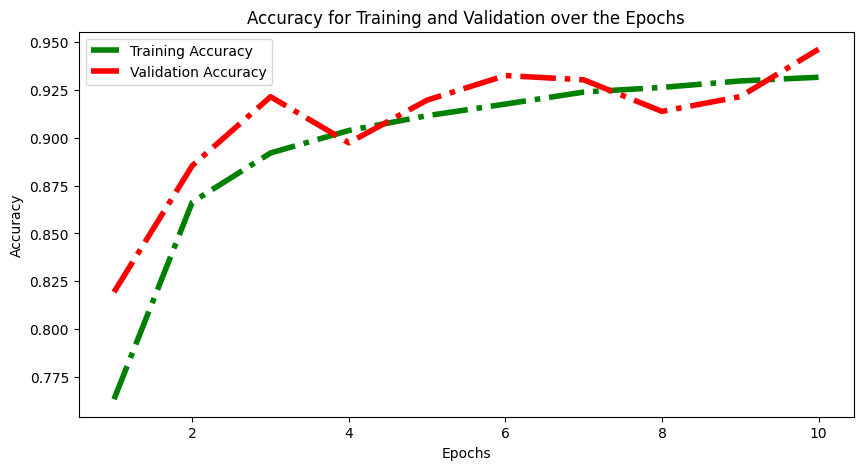

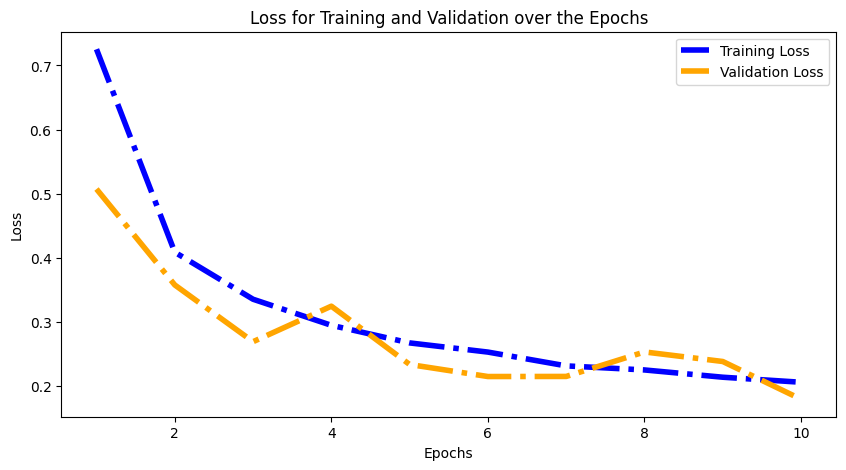

In [ ]:
plot_training_history(history_before_retain_efficentnet)

In [ ]:
Testing_image_rgb.shape, Testing_labels_tensor.shape

(TensorShape([10000, 32, 32, 3]), TensorShape([10000]))

In [ ]:
# Check if values are normalized in [0, 1]
min_val = tf.reduce_min(Testing_image_rgb).numpy()
max_val = tf.reduce_max(Testing_image_rgb).numpy()

print(f"Min value: {min_val}, Max value: {max_val}")


Min value: 0.0, Max value: 1.0


#-------Predicting test dataset-------

In [ ]:
predictions_labels_efficient = model.predict(Testing_image_rgb)
pre_labels = np.argmax(predictions_labels_efficient, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step


In [ ]:
Testing_accuracy_ConvNeXtTiny = accuracy_score(Testing_labels_tensor,pre_labels)
print(f"Testing Accuracy of Base Model + Dense Layer : {Testing_accuracy_ConvNeXtTiny}")

Testing Accuracy of Base Model + Dense Layer : 0.9398


#---------------------------Fine Tuning Base Model Layers ConvNeXtTiny (Part 2) ---------------------

In [ ]:
ConvNeXtTiny_base_retained = keras.applications.ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=(32, 32, 3),pooling ='max')

In [ ]:
for layer in ConvNeXtTiny_base_retained.layers:
    layer.trainable = False

# Unfreeze the layers with exact names in the list
conv_blocks = ['layer_normalization_1','convnext_tiny_stage_3_block_2_layer_scale','convnext_tiny_stage_3_block_2_pointwise_conv_2','convnext_tiny_stage_3_block_2_pointwise_conv_1','convnext_tiny_stage_3_block_2_depthwise_conv',
 'convnext_tiny_stage_3_block_1_pointwise_conv_2','convnext_tiny_stage_3_block_1_pointwise_conv_1','convnext_tiny_stage_3_block_2_layernorm','convnext_tiny_stage_3_block_2_depthwise_conv','convnext_tiny_stage_3_block_1_pointwise_conv_2',
 'convnext_tiny_stage_3_block_1_pointwise_conv_1','convnext_tiny_stage_3_block_1_layernorm','convnext_tiny_stage_3_block_1_depthwise_conv','convnext_tiny_stage_3_block_0_pointwise_conv_2','convnext_tiny_stage_3_block_0_pointwise_conv_1',
 'convnext_tiny_stage_3_block_0_depthwise_conv','convnext_tiny_downsampling_block_2','convnext_tiny_stage_2_block_8_layer_scale','convnext_tiny_stage_2_block_8_pointwise_conv_2','convnext_tiny_stage_2_block_8_pointwise_conv_1',
 'convnext_tiny_stage_2_block_8_depthwise_conv','convnext_tiny_stage_2_block_8_layernorm','convnext_tiny_stage_2_block_7_layer_scale','convnext_tiny_stage_2_block_7_pointwise_conv_2']
for layer in ConvNeXtTiny_base_retained.layers:
    if layer.name in conv_blocks:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=INPUT_SHAPE_R)
x = ConvNeXtTiny_base_retained(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(OUTPUT_SHAPE_R, activation='softmax')(x)


model_base_ConvNeXtTiny_dense_layer_Retrained = tf.keras.Model(inputs, outputs)


model_base_ConvNeXtTiny_dense_layer_Retrained.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [ ]:
model_base_ConvNeXtTiny_dense_layer_Retrained.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 768)                 │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,919,850 (106.51 MB)

 Trainable params: 17,361,290 (66.23 MB)

 Non-trainable params: 10,558,560 (40.28 MB)

In [ ]:
Early_callback_stop_retrained = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
history_after_Fine_tuning = model_base_ConvNeXtTiny_dense_layer_Retrained.fit(
    x=X_train_rgb,
    y=y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val_rgb, y_val),
    verbose=2,
    callbacks=[Early_callback_stop_retrained, ensorboard_logistic]
)


Epoch 1/10
3000/3000 - 50s - 17ms/step - accuracy: 0.7822 - loss: 0.6980 - val_accuracy: 0.9123 - val_loss: 0.2821
Epoch 2/10
3000/3000 - 25s - 8ms/step - accuracy: 0.9271 - loss: 0.2386 - val_accuracy: 0.9529 - val_loss: 0.1608
Epoch 3/10
3000/3000 - 24s - 8ms/step - accuracy: 0.9506 - loss: 0.1595 - val_accuracy: 0.9554 - val_loss: 0.1365
Epoch 4/10
3000/3000 - 25s - 8ms/step - accuracy: 0.9606 - loss: 0.1244 - val_accuracy: 0.9668 - val_loss: 0.1082
Epoch 5/10
3000/3000 - 24s - 8ms/step - accuracy: 0.9680 - loss: 0.1021 - val_accuracy: 0.9638 - val_loss: 0.1155
Epoch 6/10
3000/3000 - 24s - 8ms/step - accuracy: 0.9716 - loss: 0.0896 - val_accuracy: 0.9671 - val_loss: 0.1076
Epoch 7/10
3000/3000 - 24s - 8ms/step - accuracy: 0.9753 - loss: 0.0777 - val_accuracy: 0.9692 - val_loss: 0.0949
Epoch 8/10
3000/3000 - 24s - 8ms/step - accuracy: 0.9789 - loss: 0.0681 - val_accuracy: 0.9756 - val_loss: 0.0787
Epoch 9/10
3000/3000 - 25s - 8ms/step - accuracy: 0.9810 - loss: 0.0598 - val_accuracy:

In [ ]:
training_history_after_Fine_tuning = history_after_Fine_tuning.history

max_training_accuracy_fine_tuning = max(training_history_after_Fine_tuning['accuracy'])
max_validation_accuracy_fine_tuning = max(training_history_after_Fine_tuning['val_accuracy'])

# Print the metrics
print("Training Metrics After Retraining and Fine Tuning the Base Model:")
print(f"Max Training Accuracy: {max_training_accuracy_fine_tuning}")
print(f" Max Validation Accuracy: {max_validation_accuracy_fine_tuning}")


Training Metrics After Retraining and Fine Tuning the Base Model:
Max Training Accuracy: 0.9826041460037231
 Max Validation Accuracy: 0.9755833148956299


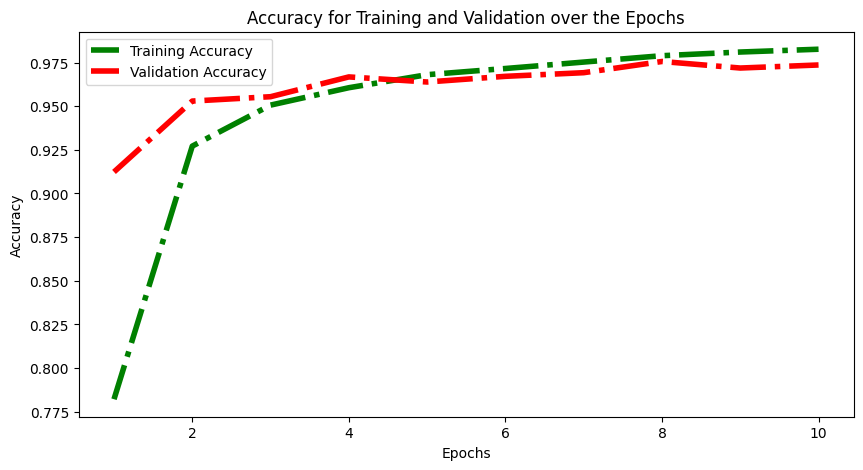

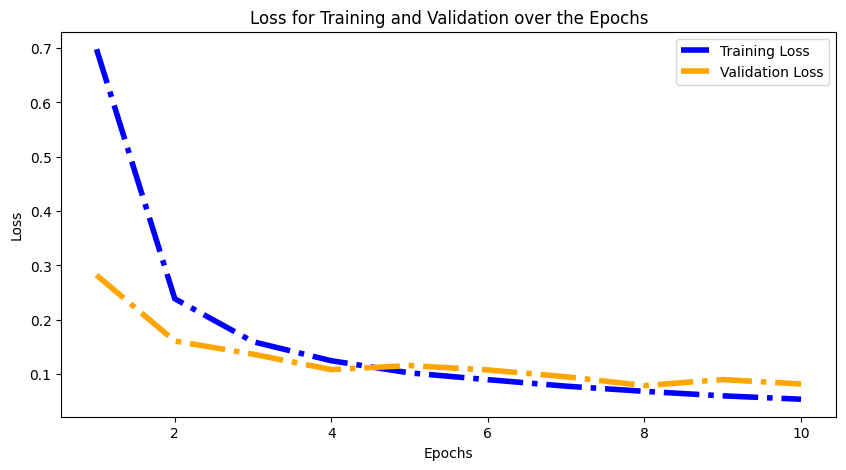

In [ ]:
plot_training_history(history_after_Fine_tuning)

#----------------------- Testing the Fine tune model On Testing Set ------------------------------------------

In [ ]:
Testing_image_rgb.shape, Testing_labels_tensor.shape

(TensorShape([10000, 32, 32, 3]), TensorShape([10000]))

In [ ]:
# Check if values are normalized in [0, 1]
min_val = tf.reduce_min(Testing_image_rgb_N).numpy()
max_val = tf.reduce_max(Testing_image_rgb_N).numpy()

print(f"Min value: {min_val}, Max value: {max_val}")


Min value: 0.0, Max value: 1.0


In [ ]:
predictions_labels_retrained = model_base_ConvNeXtTiny_dense_layer_Retrained.predict(Testing_image_rgb)
pre_labels_retrained = np.argmax(predictions_labels_retrained, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
testing_Accuracy_retrained = accuracy_score(Testing_labels_tensor,pre_labels_retrained)
print(f"Testing Accuracy after Fine Tuning the Base Model : {testing_Accuracy_retrained}")

Testing Accuracy after Fine Tuning the Base Model : 0.9713


In [ ]:
for layer in model_base_ConvNeXtTiny_dense_layer_Retrained.layers:
    print(f"Layer Name: {layer.output}")

Layer Name: <KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor_1496>
Layer Name: <KerasTensor shape=(None, 768), dtype=float32, sparse=False, name=keras_tensor_1495>
Layer Name: <KerasTensor shape=(None, 768), dtype=float32, sparse=False, name=keras_tensor_1498>
Layer Name: <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_1499>
Layer Name: <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_1500>


In [ ]:
model_base_ConvNeXtTiny_dense_layer_Retrained.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 768)                 │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,642,432 (238.96 MB)

 Trainable params: 17,361,290 (66.23 MB)

 Non-trainable params: 10,558,560 (40.28 MB)

 Optimizer params: 34,722,582 (132.46 MB)

#--Checking Model Layers


In [ ]:
for layer in model_base_ConvNeXtTiny_dense_layer_Retrained.layers:
    print(layer.__class__)

<class 'keras.src.layers.core.input_layer.InputLayer'>
<class 'keras.src.models.functional.Functional'>
<class 'keras.src.layers.reshaping.flatten.Flatten'>
<class 'keras.src.layers.core.dense.Dense'>
<class 'keras.src.layers.core.dense.Dense'>


#----Saving The Model--------

In [ ]:
#model_base_ConvNeXtTiny_dense_layer_Retrained.save('/content/gdrive/My Drive/CS517_Data_Set/ConvNextTinymodel_fine_tuned.h5')